## Transfer Learning xception using Tensorflow

Please download the dataset from the below url

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [63]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [64]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/breakHis_project/train'
valid_path = '/content/drive/MyDrive/breakHis_project/val'
test_path = '/content/drive/MyDrive/breakHis_project/test'

In [65]:
# Import the Xception library as shown below and add preprocessing layer to the front of Xception
# Here we will be using imagenet weights

xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [66]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [67]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/breakHis_project/train/*')

In [68]:
folders

['/content/drive/MyDrive/breakHis_project/train/covid',
 '/content/drive/MyDrive/breakHis_project/train/normal',
 '/content/drive/MyDrive/breakHis_project/train/pneumonia']

In [69]:
# our layers - you can add more if you want
x = Flatten()(xception.output)

In [70]:
len(folders)

3

In [71]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [72]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [73]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  # optimizer='adam',
  optimizer= Adam(learning_rate=0.01),
  metrics=['accuracy']
)


In [74]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [75]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2823 images belonging to 3 classes.
Found 807 images belonging to 3 classes.


In [76]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 405 images belonging to 3 classes.


In [77]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
89/89 [==============================] - 993s 11s/step - loss: 20.2395 - accuracy: 0.8399 - val_loss: 6.5198 - val_accuracy: 0.9133
Epoch 2/20
89/89 [==============================] - 671s 8s/step - loss: 6.6610 - accuracy: 0.9093 - val_loss: 7.9805 - val_accuracy: 0.8823
Epoch 3/20
89/89 [==============================] - 676s 8s/step - loss: 6.8979 - accuracy: 0.9104 - val_loss: 5.7071 - val_accuracy: 0.9071
Epoch 4/20
89/89 [==============================] - 674s 8s/step - loss: 7.9546 - accuracy: 0.9122 - val_loss: 12.3741 - val_accuracy: 0.8748
Epoch 5/20
89/89 [==============================] - 677s 8s/step - loss: 6.8639 - accuracy: 0.9249 - val_loss: 10.5720 - val_accuracy: 0.8885
Epoch 6/20
89/89 [==============================] - 674s 8s/step - loss: 9.1155 - accuracy: 0.9072 - val_loss: 6.4752 - val_accuracy: 0.9281
Epoch 7/20
89/89 [==============================] - 681s 8s/step - loss: 7.3382 - accuracy: 0.9270 - val_loss: 11.5758 - val_accuracy: 0.8810
Epoch 8/

In [78]:
import matplotlib.pyplot as plt

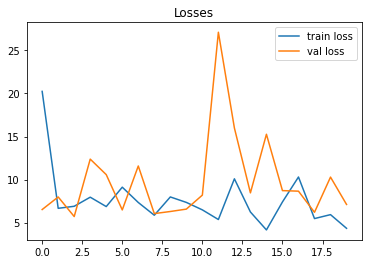

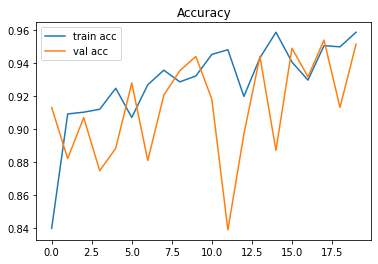

<Figure size 432x288 with 0 Axes>

In [79]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title('Losses')
plt.show()
plt.savefig('LossVal_loss')
print()
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [80]:
# average training accuracy
np.mean(r.history['accuracy'])

0.9287105917930603

In [81]:
# val accuracy
model.evaluate(val_set)

26/26 [==============================] - 146s 6s/step - loss: 7.1116 - accuracy: 0.9517


[7.111575603485107, 0.9516728520393372]

In [82]:
# test accuracy
model.evaluate(test_set)

13/13 [==============================] - 110s 9s/step - loss: 9.2282 - accuracy: 0.9333


[9.228177070617676, 0.9333333373069763]

In [83]:
test_set.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
prob = model.predict(test_set)
predIdxs = np.argmax(prob, axis=1) 

print('\n')
print(classification_report(test_set.labels, predIdxs,target_names = ['COVID','Normal','Viral Pneumonia'], digits=5))



                 precision    recall  f1-score   support

          COVID    0.94366   0.99259   0.96751       135
         Normal    0.91538   0.88148   0.89811       135
Viral Pneumonia    0.93985   0.92593   0.93284       135

       accuracy                        0.93333       405
      macro avg    0.93297   0.93333   0.93282       405
   weighted avg    0.93297   0.93333   0.93282       405



In [85]:

y_true = test_set.labels
y_pred = predIdxs
cm=confusion_matrix(y_true,y_pred)
cm

array([[134,   1,   0],
       [  8, 119,   8],
       [  0,  10, 125]])

Text(69.0, 0.5, 'Predicted Values')

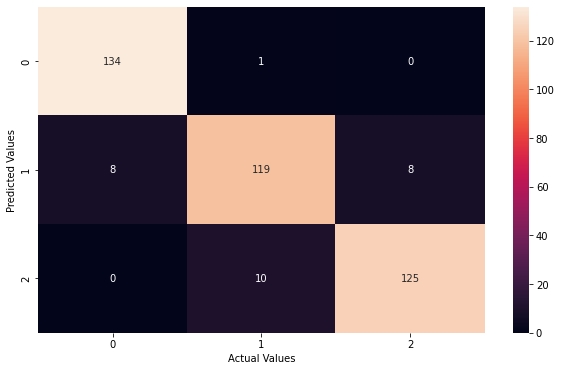

In [86]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [87]:
from sklearn.metrics import accuracy_score, f1_score,matthews_corrcoef,make_scorer, precision_score, recall_score, balanced_accuracy_score
score=accuracy_score(y_true,y_pred)
# scorers = {
#             'f1_score': make_scorer(f1_score, average='micro'),
#             # 'precision_score': make_scorer(precision_score, average='micro'),
#             # 'recall_score': make_scorer(recall_score, average='micro'),
#             'accuracy_score': make_scorer(accuracy_score)
# }
f1 = f1_score(y_true, y_pred,  average='micro')
pre = precision_score(y_true, y_pred,  average='micro')
recall = recall_score(y_true, y_pred,  average='micro')
acc = balanced_accuracy_score(y_true, y_pred)
# mcc = matthews_corrcoef(y_true,y_pred)
# print(f"accuracy {score} f1 {f1} mcc {mcc}")

print(f1, pre, recall, acc)

0.9333333333333333 0.9333333333333333 0.9333333333333333 0.9333333333333335


In [88]:
# # save it as a h5 file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('model_xception.h5')

In [89]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/model_xception.h5')

In [90]:
img=image.load_img('/content/drive/MyDrive/breakHis_project/test/covid/COVID-1044.png',target_size=(224,224))
x=image.img_to_array(img)
x=x/255
x.shape

(224, 224, 3)

In [91]:
# from keras.applications.xception import preprocess_input
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [92]:
img_data = img_data.reshape(1,224,224,3)

In [93]:
model.predict(img_data)

array([[0., 1., 0.]], dtype=float32)

In [94]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([1])

In [95]:
a==0 # 0 = covid, 1 = normal, 2= Pneumonia

array([False])

In [96]:
img_path = '/content/drive/MyDrive/breakHis_project/test/pneumonia/Viral Pneumonia-1047.png'

category = img_path.split('/')[-1].split('-')[0].upper()
true = ''
if category == 'COVID':
    true = 'COVID'
elif category == 'VIRAL PNEUMONIA':
    true = 'Viral Pneumonia'
else:
    true = 'Normal'
print(f'True value is : {true}')
image = load_img(img_path, target_size=(224, 224))
img = img_to_array(image)/255
img = img.reshape((1, 224, 224, 3))

True value is : Viral Pneumonia


True value is : Viral Pneumonia
Prediction is:
Viral Pneumonia 


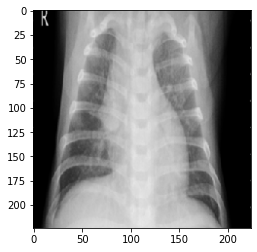

In [97]:

print(f'True value is : {true}')
image = load_img(img_path, target_size=(224, 224))
img = img_to_array(image)/255
img = img.reshape((1, 224, 224, 3))

result = model.predict(img)
result = np.argmax(result, axis=-1)
print('Prediction is:')
if result == 0:
    print("COVID")
elif result == 1:
    print("Normal")
else:
    print("Viral Pneumonia ")
    
plt.imshow(image)